<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Analise_de_Algoritmos_e_Estrutura_de_Dados/blob/main/Busca_em_Largura_BFS_Profundidade_LFS_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

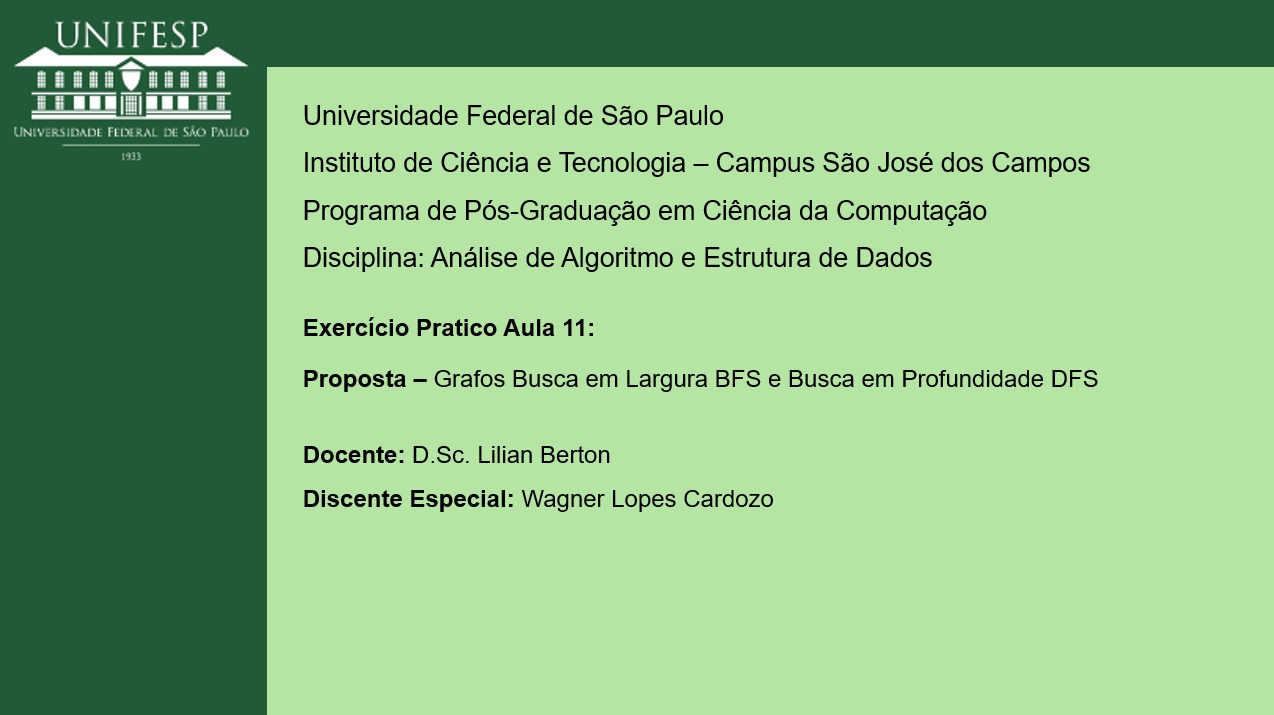

#<font color=lightgreen>Estes algoritmos são implementados para busca em Grafos sendo busca em largura BFS e busca em profundidade DFS, fazendo a tomada de tempos em segundos comparando se para buscar um determinado elemento em um vértice de um grafo buscando usando largura BFS ou profundidade DFS qual é mais eficiente no tempo de busca e buscando menor caminho em grfos não ponderados e ponderados qual é o mais eficiente ao procurar ciclos em grafos direcionados e não direcionados.

In [ ]:
!pip install tabulate

In [ ]:
import time
from collections import deque
from tabulate import tabulate

# Criando um grafo totalmente conectado com 10000 vértices
class Graph:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adj_list = {i: [] for i in range(1, num_vertices + 1)}
        self._create_complete_graph()

    def _create_complete_graph(self):
        for i in range(1, self.num_vertices + 1):
            self.adj_list[i] = [j for j in range(1, self.num_vertices + 1) if j != i]

    def bfs(self, start_vertex, target_vertex):
        visited = set()
        queue = deque([start_vertex])

        while queue:
            vertex = queue.popleft()
            if vertex not in visited:
                visited.add(vertex)
                if vertex == target_vertex:
                    return True
                queue.extend(neighbor for neighbor in self.adj_list[vertex] if neighbor not in visited)
        return False

    def dfs(self, start_vertex, target_vertex):
        visited = set()
        stack = [start_vertex]

        while stack:
            vertex = stack.pop()
            if vertex not in visited:
                visited.add(vertex)
                if vertex == target_vertex:
                    return True
                stack.extend(neighbor for neighbor in self.adj_list[vertex] if neighbor not in visited)
        return False

if __name__ == "__main__":
    # Configuração do grafo e busca
    num_vertices = 10000
    target_vertex = 7279
    graph = Graph(num_vertices)

    # Medindo o tempo da busca BFS
    start_time_bfs = time.time()
    found_bfs = graph.bfs(1, target_vertex)
    end_time_bfs = time.time()
    time_bfs = end_time_bfs - start_time_bfs

    # Medindo o tempo da busca DFS
    start_time_dfs = time.time()
    found_dfs = graph.dfs(1, target_vertex)
    end_time_dfs = time.time()
    time_dfs = end_time_dfs - start_time_dfs

    # Preparando os resultados
    results = [
        ["BFS", time_bfs],
        ["DFS", time_dfs]
    ]

    # Exibindo os resultados em tabela
    print(tabulate(results, headers=["Método de Busca", "Tempo (segundos)"], tablefmt="grid"))


+-------------------+--------------------+
| Método de Busca   |   Tempo (segundos) |
+===================+====================+
| BFS               |            6.52302 |
+-------------------+--------------------+
| DFS               |            2.9572  |
+-------------------+--------------------+


In [ ]:
import time
from collections import deque
from tabulate import tabulate

class GraphUnweighted:
    """Classe para representar um grafo não ponderado"""
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adj_list = {i: [] for i in range(1, num_vertices + 1)}

    def add_edge(self, u, v):
        self.adj_list[u].append(v)
        self.adj_list[v].append(u)

    def bfs_shortest_path(self, start, target):
        """Menor caminho em grafo não ponderado com BFS"""
        visited = set()
        queue = deque([(start, 0)])  # (vértice, distância acumulada)

        while queue:
            vertex, distance = queue.popleft()
            if vertex == target:
                return distance
            if vertex not in visited:
                visited.add(vertex)
                for neighbor in self.adj_list[vertex]:
                    if neighbor not in visited:
                        queue.append((neighbor, distance + 1))
        return -1  # Caminho não encontrado

    def dfs_shortest_path(self, start, target):
        """Menor caminho em grafo não ponderado com DFS"""
        visited = set()
        stack = [(start, 0)]  # (vértice, distância acumulada)
        shortest_path = float('inf')

        while stack:
            vertex, distance = stack.pop()
            if vertex == target:
                shortest_path = min(shortest_path, distance)
            if vertex not in visited:
                visited.add(vertex)
                for neighbor in self.adj_list[vertex]:
                    if neighbor not in visited:
                        stack.append((neighbor, distance + 1))
        return shortest_path if shortest_path != float('inf') else -1

class GraphWeighted:
    """Classe para representar um grafo ponderado"""
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adj_list = {i: [] for i in range(1, num_vertices + 1)}

    def add_edge(self, u, v, weight):
        self.adj_list[u].append((v, weight))
        self.adj_list[v].append((u, weight))

    def bfs_shortest_path(self, start, target):
        """Menor caminho em grafo ponderado com BFS (considerando arestas com peso uniforme)"""
        visited = set()
        queue = deque([(start, 0)])  # (vértice, distância acumulada)

        while queue:
            vertex, distance = queue.popleft()
            if vertex == target:
                return distance
            if vertex not in visited:
                visited.add(vertex)
                for neighbor, weight in self.adj_list[vertex]:
                    if neighbor not in visited:
                        queue.append((neighbor, distance + weight))
        return -1  # Caminho não encontrado

    def dfs_shortest_path(self, start, target):
        """Menor caminho em grafo ponderado com DFS"""
        visited = set()
        stack = [(start, 0)]  # (vértice, distância acumulada)
        shortest_path = float('inf')

        while stack:
            vertex, distance = stack.pop()
            if vertex == target:
                shortest_path = min(shortest_path, distance)
            if vertex not in visited:
                visited.add(vertex)
                for neighbor, weight in self.adj_list[vertex]:
                    if neighbor not in visited:
                        stack.append((neighbor, distance + weight))
        return shortest_path if shortest_path != float('inf') else -1

if __name__ == "__main__":
    num_vertices = 10000
    target_vertex = 7279

    # Grafo não ponderado
    graph_unweighted = GraphUnweighted(num_vertices)
    for i in range(1, num_vertices):
        graph_unweighted.add_edge(i, i + 1)

    # Grafo ponderado
    graph_weighted = GraphWeighted(num_vertices)
    for i in range(1, num_vertices):
        graph_weighted.add_edge(i, i + 1, 1)

    # Medindo o tempo para BFS e DFS em grafo não ponderado
    start_bfs_unweighted = time.time()
    bfs_unweighted_result = graph_unweighted.bfs_shortest_path(1, target_vertex)
    end_bfs_unweighted = time.time()
    time_bfs_unweighted = end_bfs_unweighted - start_bfs_unweighted

    start_dfs_unweighted = time.time()
    dfs_unweighted_result = graph_unweighted.dfs_shortest_path(1, target_vertex)
    end_dfs_unweighted = time.time()
    time_dfs_unweighted = end_dfs_unweighted - start_dfs_unweighted

    # Medindo o tempo para BFS e DFS em grafo ponderado
    start_bfs_weighted = time.time()
    bfs_weighted_result = graph_weighted.bfs_shortest_path(1, target_vertex)
    end_bfs_weighted = time.time()
    time_bfs_weighted = end_bfs_weighted - start_bfs_weighted

    start_dfs_weighted = time.time()
    dfs_weighted_result = graph_weighted.dfs_shortest_path(1, target_vertex)
    end_dfs_weighted = time.time()
    time_dfs_weighted = end_dfs_weighted - start_dfs_weighted

    # Exibindo resultados em forma de tabela
    results = [
        ["BFS (Não Ponderado)", time_bfs_unweighted, bfs_unweighted_result],
        ["DFS (Não Ponderado)", time_dfs_unweighted, dfs_unweighted_result],
        ["BFS (Ponderado)", time_bfs_weighted, bfs_weighted_result],
        ["DFS (Ponderado)", time_dfs_weighted, dfs_weighted_result]
    ]

    print(tabulate(results, headers=["Método", "Tempo (segundos)", "Menor Caminho"], tablefmt="grid"))


+---------------------+--------------------+-----------------+
| Método              |   Tempo (segundos) |   Menor Caminho |
+=====================+====================+=================+
| BFS (Não Ponderado) |         0.00376201 |            7278 |
+---------------------+--------------------+-----------------+
| DFS (Não Ponderado) |         0.0050714  |            7278 |
+---------------------+--------------------+-----------------+
| BFS (Ponderado)     |         0.00379944 |            7278 |
+---------------------+--------------------+-----------------+
| DFS (Ponderado)     |         0.00522804 |            7278 |
+---------------------+--------------------+-----------------+


In [ ]:
import time
from collections import deque
from tabulate import tabulate

class DirectedGraph:
    """Classe para representar um grafo direcionado."""
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adj_list = {i: [] for i in range(num_vertices)}

    def add_edge(self, u, v):
        self.adj_list[u].append(v)

    def detect_cycle_bfs(self):
        """Detecção de ciclo em grafo direcionado usando BFS (Kahn's Algorithm)."""
        in_degree = {i: 0 for i in range(self.num_vertices)}
        for u in self.adj_list:
            for v in self.adj_list[u]:
                in_degree[v] += 1

        queue = deque([v for v in in_degree if in_degree[v] == 0])
        visited_count = 0

        while queue:
            vertex = queue.popleft()
            visited_count += 1
            for neighbor in self.adj_list[vertex]:
                in_degree[neighbor] -= 1
                if in_degree[neighbor] == 0:
                    queue.append(neighbor)

        return visited_count != self.num_vertices  # Se não visitou todos, há ciclo

    def detect_cycle_dfs(self):
        """Detecção de ciclo em grafo direcionado usando DFS."""
        visited = set()
        rec_stack = set()

        def dfs(vertex):
            if vertex in rec_stack:
                return True
            if vertex in visited:
                return False
            visited.add(vertex)
            rec_stack.add(vertex)
            for neighbor in self.adj_list[vertex]:
                if dfs(neighbor):
                    return True
            rec_stack.remove(vertex)
            return False

        for v in range(self.num_vertices):
            if dfs(v):
                return True
        return False


class UndirectedGraph:
    """Classe para representar um grafo não direcionado."""
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adj_list = {i: [] for i in range(num_vertices)}

    def add_edge(self, u, v):
        self.adj_list[u].append(v)
        self.adj_list[v].append(u)

    def detect_cycle_bfs(self):
        """Detecção de ciclo em grafo não direcionado usando BFS."""
        visited = set()

        def bfs(start):
            queue = deque([(start, -1)])  # (vértice atual, pai)
            while queue:
                vertex, parent = queue.popleft()
                for neighbor in self.adj_list[vertex]:
                    if neighbor not in visited:
                        visited.add(neighbor)
                        queue.append((neighbor, vertex))
                    elif neighbor != parent:
                        return True
            return False

        for v in range(self.num_vertices):
            if v not in visited:
                if bfs(v):
                    return True
        return False

    def detect_cycle_dfs(self):
        """Detecção de ciclo em grafo não direcionado usando DFS."""
        visited = set()

        def dfs(vertex, parent):
            visited.add(vertex)
            for neighbor in self.adj_list[vertex]:
                if neighbor not in visited:
                    if dfs(neighbor, vertex):
                        return True
                elif neighbor != parent:
                    return True
            return False

        for v in range(self.num_vertices):
            if v not in visited:
                if dfs(v, -1):
                    return True
        return False


if __name__ == "__main__":
    num_vertices = 200

    # Criando um grafo direcionado com ciclo
    directed_graph = DirectedGraph(num_vertices)
    for i in range(num_vertices - 1):
        directed_graph.add_edge(i, i + 1)
    directed_graph.add_edge(num_vertices - 1, 0)  # Adicionando ciclo

    # Criando um grafo não direcionado com ciclo
    undirected_graph = UndirectedGraph(num_vertices)
    for i in range(num_vertices - 1):
        undirected_graph.add_edge(i, i + 1)
    undirected_graph.add_edge(num_vertices - 1, 0)  # Adicionando ciclo

    # Detectando ciclos com BFS e DFS no grafo direcionado
    start_bfs_directed = time.time()
    cycle_bfs_directed = directed_graph.detect_cycle_bfs()
    end_bfs_directed = time.time()

    start_dfs_directed = time.time()
    cycle_dfs_directed = directed_graph.detect_cycle_dfs()
    end_dfs_directed = time.time()

    # Detectando ciclos com BFS e DFS no grafo não direcionado
    start_bfs_undirected = time.time()
    cycle_bfs_undirected = undirected_graph.detect_cycle_bfs()
    end_bfs_undirected = time.time()

    start_dfs_undirected = time.time()
    cycle_dfs_undirected = undirected_graph.detect_cycle_dfs()
    end_dfs_undirected = time.time()

    # Preparando os resultados
    results = [
        ["Direcionado - BFS", end_bfs_directed - start_bfs_directed, cycle_bfs_directed],
        ["Direcionado - DFS", end_dfs_directed - start_dfs_directed, cycle_dfs_directed],
        ["Não Direcionado - BFS", end_bfs_undirected - start_bfs_undirected, cycle_bfs_undirected],
        ["Não Direcionado - DFS", end_dfs_undirected - start_dfs_undirected, cycle_dfs_undirected],
    ]

    # Exibindo os resultados em tabela
    print(tabulate(results, headers=["Método", "Tempo (segundos)", "Ciclo Detectado"], tablefmt="grid"))


+-----------------------+--------------------+-------------------+
| Método                |   Tempo (segundos) | Ciclo Detectado   |
+=======================+====================+===================+
| Direcionado - BFS     |        7.77245e-05 | True              |
+-----------------------+--------------------+-------------------+
| Direcionado - DFS     |        0.000217438 | True              |
+-----------------------+--------------------+-------------------+
| Não Direcionado - BFS |        1.5974e-05  | True              |
+-----------------------+--------------------+-------------------+
| Não Direcionado - DFS |        0.000103235 | True              |
+-----------------------+--------------------+-------------------+


#<font color=lightgreen>Referências Bibliográfica:

* CORMEM, T. H., LEISERSON C. E., RIVEST R. L., STEIN C., Algoritmos
Teoria e Prática – Gen LTC, 3ª Edição, 2012, ISBN-13: 978-8535236996

* RUSSEL, S., NORVIG, P., Inteligência Artificial Tradução da Terceira
Edição, Ed. Campus – Elsevier, 2013,
https://www.kufunda.net/publicdocs/Intelig%C3%AAncia%20Artificial%20(Peter%20Norvig,%20Stuart%20Russell).pdf

* BERTON, L., Algoritmos em Grafos Busca em Largura e Profundidade,
Universidade Federal de São Paulo UniFeSP, São José dos Campos,
2023, https://classroom.google.com/c/Njg1MDAwMDQ1OTAx

* BACKES, A. Grafos – Aula 08 (Notas de Aula), Faculdade de
Computação, Universidade Federal de Uberlândia, 2020,
https://www.facom.ufu.br/~backes/gsi011/Aula08-Grafos.pdf

* BACKES, A. Grafos Buscas e Menor Caminho – Aula 09 (Notas de Aula),
Faculdade de Computação, Universidade Federal de Uberlândia, 2021,
https://www.facom.ufu.br/~backes/gsi011/Aula09-GrafosBuscas.pdf

* KIOTHECA, F., DATE, V. T., Introdução e Busca em Grafos – Aula 08
(Notas de Aula), Desafios de Programação, Universidade Federal do
Paraná UFPR, 2023, https://www.inf.ufpr.br/andre/Disciplinas/CI1031-2023-1/08-grafos-parte-1.pdf

* CARVALHO, M. A. M., Programação (Notas de Aula), Instituto Federal
Minas Gerais IFMG - DeCom,
http://www.decom.ufop.br/marco/site_media/uploads/extensao/12_aula_12.pdf

* OLIVEIRA, H. C. B., Algoritmos em Grafos Busca em Largura Aula 05
(Notas de Aula), Universidade Federal de Alfenas UniFAl,
https://www.bcc.unifalmg.edu.br/~humberto/disciplinas/2010_2_grafos/pdf_aulas/aula_05.pdf

* OLIVEIRA, H. C. B., Algoritmos em Grafos Busca em Largura Aula 04
(Notas de Aula), Universidade Federal de Alfenas UniFAl,
https://www.bcc.unifalmg.edu.br/~humberto/disciplinas/2010_2_grafos/pdf_aulas/aula_04.pdf

* PARDO, T. A. S., CRISTINA, M., Algoritmos e Estrutura de Dados 2 SCE-
183, Grafos Busca (Notas de Aula), CerComp UFG,
https://files.cercomp.ufg.br/weby/up/666/o/Grafosbuscas_DFS_BFS_Ord
_Topologica.pdf?1389784326

* SOUZA, C., SILVA, C., LEE, O., MIYAZAWA, F., Projeto e Análise de
Algoritmos – Busca em Grafos, Unicamp, 2019,
https://www.ic.unicamp.br/~rafael/cursos/2s2019/mo417/slides/12-
busca.pdf

#<font color=lightgreen>Referência Áudio Visual:

* BERTON L., Mundo das Adas, Vídeo Aula “Aula 12 Grafos Busca em
Largura e Profundidade”,YouTube,
https://www.youtube.com/watch?v=XjbDv8KPYHI

* BACKES A., Programação Descomplicada – Linguagem C, Video Aula
“Estrutura de Dados em C | Aula 56 – Grafos – Definição”,
https://www.youtube.com/watch?v=gJvSmrxekDo&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=57

* BACKES A., Programação Descomplicada – Linguagem C, Video Aula
“Estrutura de Dados em C | Aula 57 – Grafos - Propriedades”,
https://www.youtube.com/watch?v=qvSbkbUkZjo&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=58

* BACKES A., Programação Descomplicada – Linguagem C, Video Aula
“Estrutura de Dados em C | Aula 58 – Grafos – Tipos de Grafos – Parte
1”,
https://www.youtube.com/watch?v=5saF2Dg6sIc&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=59

* BACKES A., Programação Descomplicada – Linguagem C, Video Aula
“Estrutura de Dados em C | Aula 59 – Grafos – Tipos de Grafos – Parte
2”,
https://www.youtube.com/watch?v=LsLK04bWgy4&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=60

* BACKES A., Programação Descomplicada – Linguagem C, Video Aula
“Estrutura de Dados em C | Aula 60 – Representação de Grafos (Parte
1)”,https://www.youtube.com/watch?v=k9DJnCOtKg&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=61

* BACKES A., Programação Descomplicada – Linguagem C, Video Aula
“Estrutura de Dados em C | Aula 61 – Representação de Grafos (Parte
2)”,https://www.youtube.com/watch?v=-dAxrWDufa8&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=62

* BACKES A., Programação Descomplicada – Linguagem C, Video Aula
“Estrutura de Dados em C | Aula 62 – Busca em Grafos”,
https://www.youtube.com/watch?v=iN6PWvga5IQ&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=63

* BACKES A., Programação Descomplicada – Linguagem C, Video Aula
“Estrutura de Dados em C | Aula 63 – Grafos – Busca em
Profundidade”,
https://www.youtube.com/watch?v=pJ3ilnhXWCQ&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=64

* BACKES A., Programação Descomplicada – Linguagem C, Video Aula
“Estrutura de Dados em C | Aula 64 – Grafos – Busca em Largura”,
https://www.youtube.com/watch?v=jWoP1fTTDzE&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=65

* HALIM, S., VISUAL.GO, visualising data structures and algorithms
through Animation, 2020, https://visualgo.net/en/sssp